In [2]:
base_path = '/home/hermuba/data/significant_genes/'
import pandas as pd
def sig_genes(drug):
    df = pd.read_pickle(base_path + drug + '_significant')
    return(df)

amp = sig_genes('ampicillin')
amp['p_value'] = amp['p_value'].astype(float)
amp['mean similarity'] = amp['mean similarity'].astype(float)

TypeError: __new__() missing 2 required positional arguments: 'tag' and 'attributes'

In [3]:
hypo = amp.loc[amp['title'].str.contains('hypothetical') | amp['title'].str.contains('ncharacter') | amp['title'].str.contains('unknown')]

In [4]:
amp['hypo_or_not'] = False

In [5]:
amp.loc[hypo.index, 'hypo_or_not'] = True

/home/hermuba/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


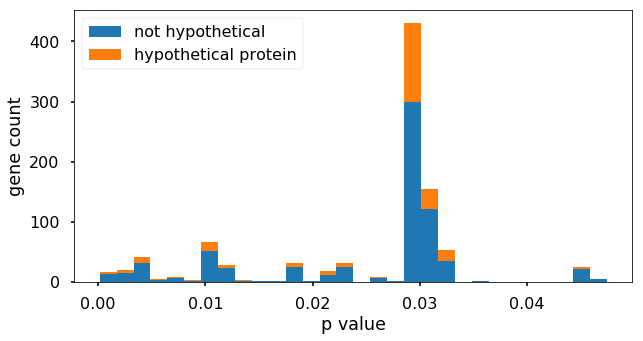

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(facecolor = 'white', figsize = (10,5))
plt.xlabel('p value')
plt.ylabel('gene count')
plt.style.use('seaborn-poster')
plt.hist([amp['p_value'], amp.loc[amp['hypo_or_not'] == True]['p_value']],30, stacked = True, label = ['not hypothetical', 'hypothetical protein'])
plt.legend()
fig.savefig('/home/hermuba/hypo_signi', format = 'svg', trasparent = True)

In [18]:
hypo.index

Index(['Cluster 39', 'Cluster 101', 'Cluster 203', 'Cluster 368',
       'Cluster 373', 'Cluster 597', 'Cluster 800', 'Cluster 845',
       'Cluster 1623', 'Cluster 1624',
       ...
       'Cluster 15578', 'Cluster 15646', 'Cluster 15665', 'Cluster 15724',
       'Cluster 15808', 'Cluster 15830', 'Cluster 15850', 'Cluster 15862',
       'Cluster 15891', 'Cluster 15918'],
      dtype='object', length=256)

In [19]:
amp.index

Index(['Cluster 25', 'Cluster 39', 'Cluster 59', 'Cluster 101', 'Cluster 104',
       'Cluster 108', 'Cluster 112', 'Cluster 114', 'Cluster 117',
       'Cluster 122',
       ...
       'Cluster 15598', 'Cluster 15646', 'Cluster 15665', 'Cluster 15724',
       'Cluster 15808', 'Cluster 15830', 'Cluster 15850', 'Cluster 15862',
       'Cluster 15891', 'Cluster 15918'],
      dtype='object', length=702)

In [22]:
amp.loc[hypo.index, 'hypo_or_not']

Cluster 39        True
Cluster 101       True
Cluster 203       True
Cluster 368       True
Cluster 373       True
Cluster 597       True
Cluster 800       True
Cluster 845       True
Cluster 1623      True
Cluster 1624      True
Cluster 1646      True
Cluster 1679      True
Cluster 1687      True
Cluster 1766      True
Cluster 1958      True
Cluster 2012      True
Cluster 2113      True
Cluster 2441      True
Cluster 2495      True
Cluster 2527      True
Cluster 2689      True
Cluster 3291     False
Cluster 3459      True
Cluster 3570      True
Cluster 3573      True
Cluster 3897      True
Cluster 3916      True
Cluster 3977      True
Cluster 4021      True
Cluster 4038      True
                 ...  
Cluster 14798     True
Cluster 14799    False
Cluster 14848    False
Cluster 14930     True
Cluster 15001     True
Cluster 15017     True
Cluster 15026     True
Cluster 15122     True
Cluster 15139     True
Cluster 15204     True
Cluster 15261     True
Cluster 15277     True
Cluster 153

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76a2199198>]], dtype=object)

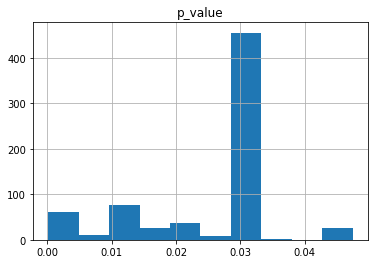

In [43]:
import matplotlib.pyplot as plt
amp['hypo_or_not'] = amp['title'].str.contains('hypothetical')
amp.hist(column = 'p_value', label = amp['hypo_or_not'], stacked = True
        )

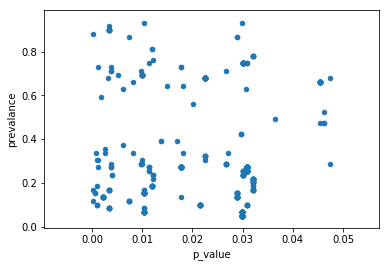

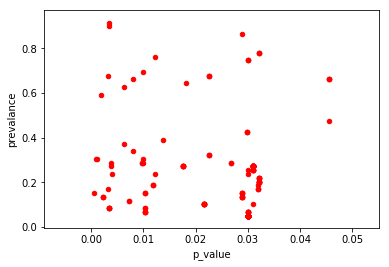

In [22]:
amp[['p_value','prevalance']].plot(kind = 'scatter', x = 'p_value', y = 'prevalance')
amp.loc[amp['title'].str.contains('hypothetical')].plot(kind = 'scatter', x = 'p_value', y = 'prevalance', color = 'red')

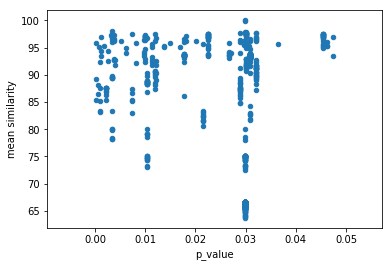

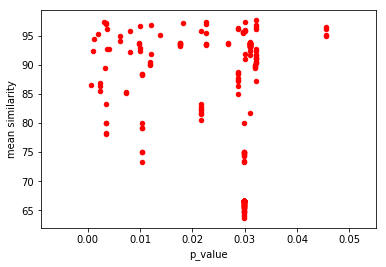

In [25]:
amp[['p_value','mean similarity']].plot(kind = 'scatter', x = 'p_value', y = 'mean similarity')
amp.loc[amp['title'].str.contains('hypothetical')].plot(kind = 'scatter', x = 'p_value', y = 'mean similarity', color = 'red')

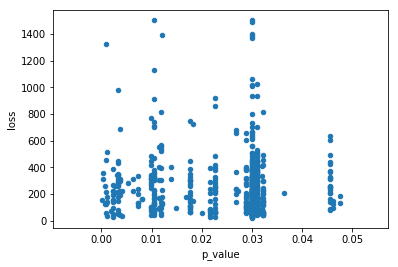

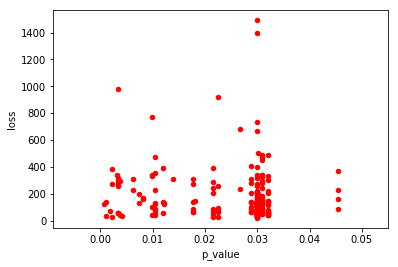

In [29]:
amp['loss'] = amp['representing gene length'] - amp['mean length']
amp['loss'] = amp['loss'].astype(float)
amp[['p_value','loss']].plot(kind = 'scatter', x = 'p_value', y = 'loss')
amp.loc[amp['title'].str.contains('hypothetical')].plot(kind = 'scatter', x = 'p_value', y = 'loss', color = 'red')